In [1]:
from pathlib import Path
import pandas as pd

In [2]:
Weekpath = Path("WeekData")
DYearpath = Path("YearData/Def")
OYearpath = Path("YearData/Off")

In [3]:
finaldf = pd.DataFrame()
Weeklist = []
DYearlist = []
OYearlist = []
for x in Weekpath.iterdir():
    Weeklist.append(x)
for x in DYearpath.iterdir():
    DYearlist.append(x)
for x in OYearpath.iterdir():
    OYearlist.append(x)

In [4]:
for x in range(len(Weeklist)):
   df2024 = pd.read_csv(Weeklist[x])
   df2024 = df2024.dropna()
   ddf2024 = pd.read_csv(DYearlist[x])
   odf2024 = pd.read_csv(OYearlist[x])
   ddf2024 = ddf2024.dropna()
   odf2024 = odf2024.dropna()
   #columnslist2 = list(ddf2024.columns.values)
   #for x in range(0, len(ddf2024.columns)):
      #if columnslist2[x] == "Tm":
         #pass
      #else:
         #columnslist2[x] = "D" + columnslist2[x] 
   #ddf2024.columns.values[0:len(ddf2024.columns)] = columnslist2
   ddf2024.iloc[0] = ddf2024.iloc[0].apply(lambda x: x if x == "Tm" else "D" + x)
   header = ddf2024.iloc[0]
   ddf2024.columns = header
   ddf2024 = ddf2024[1:]
   header = odf2024.iloc[0]
   odf2024.columns = header
   odf2024 = odf2024[1:]
   merged = pd.merge(odf2024,ddf2024, left_on='Tm', right_on='Tm', how='left')
   merged2 = pd.merge(odf2024,ddf2024, left_on='Tm', right_on='Tm', how='left')
   columnslist = list(merged2.columns.values)
   bestcolumnslist = list(merged.columns.values)
   len(merged2.columns)
   for x in range(0, len(merged2.columns)):
      if columnslist[x] == "Tm":
         pass
      else:
         columnslist[x] = "T2" + columnslist[x]
   merged2.columns.values[0:len(merged2.columns)] = columnslist
   merged.columns.values[0:len(merged2.columns)] = bestcolumnslist
   df2024 = df2024.rename(columns={"Day" : "Day", "Time" : "Time", "Winner/tie" : "Team1", "Loser/tie" : "Team2", "PtsW" : "PtsT1", "PtsL" : "PtsT2","YdsW" : "YdsT1","TOW" : "TOT1","YdsL" : "YdsT2T2","TOL" : "TOT2"})
   finalmerge = pd.merge(df2024,merged, left_on='Team1', right_on='Tm', how='left')
   finalmerge = finalmerge.drop("Tm", axis='columns')
   finalfinalmerge = pd.merge(finalmerge,merged2, left_on='Team2', right_on='Tm', how='left')
   finalfinalmerge = finalfinalmerge.drop("Tm", axis='columns')
   finaldf = pd.concat([finaldf, finalfinalmerge], sort=False)
   #finaldf = df2024.copy()

In [5]:
finaldf = finaldf.dropna()
finaldf = finaldf.drop("Team1", axis='columns')
finaldf = finaldf.drop("Team2", axis='columns')
finaldf = finaldf.drop("Day", axis='columns')
finaldf = finaldf.drop("Time", axis='columns')
for x in finaldf.columns:
    finaldf[x] = finaldf[x].astype(str).astype(float)
# if using point per game 
finaldf["PPP"] = finaldf["PF"]/finaldf["Ply"]
finaldf["PPPA"] = finaldf["DPA"]/finaldf["DPly"]
finaldf["PPPD"] = finaldf["PPP"] - finaldf["PPPA"]
finaldf["T2PPP"] = finaldf["T2PF"]/finaldf["T2Ply"]
finaldf["T2PPPA"] = finaldf["T2DPA"]/finaldf["T2DPly"]
finaldf["T2PPPD"] = finaldf["T2PPP"] - finaldf["T2PPPA"]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
correlation_matrix = finaldf.corr(method='pearson')
correlation_matrix.to_csv("matrix.csv")

In [7]:
finaldf2 = finaldf.copy()
xff = finaldf2.drop("PtsT1", axis='columns')
xff = xff.drop("PtsT2", axis='columns')
xff = xff.drop("TOT1", axis='columns')
xff = xff.drop("TOT2", axis='columns')
x_trainM1, x_testM1, y_trainM1, y_testM1 = train_test_split(xff,finaldf2[["PtsT1","PtsT2"]], test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(x_trainM1, y_trainM1)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_predM1 = model1.predict(x_testM1)
r2M1 = r2_score(y_testM1, y_predM1)
print(f"Model 1: R-squared (R²) Score: {r2M1}")
mseM1 = mean_squared_error(y_testM1, y_predM1)
print(f"Model1: Mean Squared Error: {mseM1}")

Model 1: R-squared (R²) Score: 0.5045510455181548
Model1: Mean Squared Error: 29.917962511711046


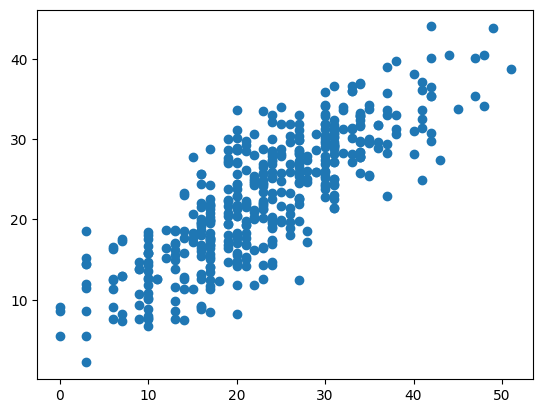

In [9]:
plt.scatter(y_testM1, y_predM1)
plt.show()

In [10]:
DYearpath = Path("predictData/Def")
OYearpath = Path("predictData/Off")
DYearlist = []
OYearlist = []
for x in DYearpath.iterdir():
    DYearlist.append(x)
for x in OYearpath.iterdir():
    OYearlist.append(x)

team_df = pd.DataFrame()
team_df2 = pd.DataFrame()
ddf2024 = pd.read_csv(DYearlist[0])
odf2024 = pd.read_csv(OYearlist[0])
ddf2024 = ddf2024.dropna()
odf2024 = odf2024.dropna()
#columnslist2 = list(ddf2024.columns.values)
#for x in range(0, len(ddf2024.columns)):
   #if columnslist2[x] == "Tm":
      #pass
   #else:
      #columnslist2[x] = "D" + columnslist2[x] 
#ddf2024.columns.values[0:len(ddf2024.columns)] = columnslist2
ddf2024.iloc[0] = ddf2024.iloc[0].apply(lambda x: x if x == "Tm" else "D" + x)
header = ddf2024.iloc[0]
ddf2024.columns = header
ddf2024 = ddf2024[1:]
header = odf2024.iloc[0]
odf2024.columns = header
odf2024 = odf2024[1:]
merged = pd.merge(odf2024,ddf2024, left_on='Tm', right_on='Tm', how='left')
merged2 = pd.merge(odf2024,ddf2024, left_on='Tm', right_on='Tm', how='left')
columnslist = list(merged2.columns.values)
bestcolumnslist = list(merged.columns.values)
len(merged2.columns)
for x in range(0, len(merged2.columns)):
   if columnslist[x] == "Tm":
      pass
   else:
      columnslist[x] = "T2" + columnslist[x]
merged2.columns.values[0:len(merged2.columns)] = columnslist
merged.columns.values[0:len(merged2.columns)] = bestcolumnslist
team_df = pd.concat([team_df, merged], sort=False)
team_df2 = pd.concat([team_df2, merged2], sort=False)

In [11]:
import numpy as np

In [12]:
np.sort(df2024["Team1"].unique())

array(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'], dtype=object)

In [13]:
team1list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team2list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

predict = {
    "Team1" : team1list,
    "Team2" : team2list
}
df_predict = pd.DataFrame(predict)
finalmerge = pd.merge(df_predict,team_df, left_on='Team1', right_on='Tm', how='left')
finalmerge = finalmerge.drop("Tm", axis='columns')
finalfinalmerge = pd.merge(finalmerge,team_df2, left_on='Team2', right_on='Tm', how='left')
finalpredict = finalfinalmerge.drop("Tm", axis='columns')
finalpredict = finalpredict.drop("Team1", axis='columns')
finalpredict = finalpredict.drop("Team2", axis='columns')
for x in finalpredict.columns:
    finalpredict[x] = finalpredict[x].astype(str).astype(float)
finalpredict["PPP"] = finalpredict["PF"]/finalpredict["Ply"]
finalpredict["PPPA"] = finalpredict["DPA"]/finalpredict["DPly"]
finalpredict["PPPD"] = finalpredict["PPP"] - finalpredict["PPPA"]
finalpredict["T2PPP"] = finalpredict["T2PF"]/finalpredict["T2Ply"]
finalpredict["T2PPPA"] = finalpredict["T2DPA"]/finalpredict["T2DPly"]
finalpredict["T2PPPD"] = finalpredict["T2PPP"] - finalpredict["T2PPPA"]
numgames = 17 #Num of games so far in season
finalpredict["YdsT1"] = (finalpredict["Y/P"] * finalpredict["Ply"]) / numgames
finalpredict["YdsT2T2"] = (finalpredict["T2Y/P"] * finalpredict["T2Ply"]) / numgames
column_to_move = finalpredict.pop('YdsT1')
finalpredict.insert(0, 'YdsT1', column_to_move) 
column_to_move = finalpredict.pop('YdsT2T2')
finalpredict.insert(1, 'YdsT2T2', column_to_move) 
firstg_pred = model1.predict(finalpredict)

In [14]:
team2list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team1list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

predict = {
    "Team1" : team1list,
    "Team2" : team2list
}
df_predict = pd.DataFrame(predict)
finalmerge = pd.merge(df_predict,team_df, left_on='Team1', right_on='Tm', how='left')
finalmerge = finalmerge.drop("Tm", axis='columns')
finalfinalmerge = pd.merge(finalmerge,team_df2, left_on='Team2', right_on='Tm', how='left')
finalpredict = finalfinalmerge.drop("Tm", axis='columns')
finalpredict = finalpredict.drop("Team1", axis='columns')
finalpredict = finalpredict.drop("Team2", axis='columns')
for x in finalpredict.columns:
    finalpredict[x] = finalpredict[x].astype(str).astype(float)
finalpredict["PPP"] = finalpredict["PF"]/finalpredict["Ply"]
finalpredict["PPPA"] = finalpredict["DPA"]/finalpredict["DPly"]
finalpredict["PPPD"] = finalpredict["PPP"] - finalpredict["PPPA"]
finalpredict["T2PPP"] = finalpredict["T2PF"]/finalpredict["T2Ply"]
finalpredict["T2PPPA"] = finalpredict["T2DPA"]/finalpredict["T2DPly"]
finalpredict["T2PPPD"] = finalpredict["T2PPP"] - finalpredict["T2PPPA"]
numgames = 17 #Num of games so far in season
finalpredict["YdsT1"] = (finalpredict["Y/P"] * finalpredict["Ply"]) / numgames
finalpredict["YdsT2T2"] = (finalpredict["T2Y/P"] * finalpredict["T2Ply"]) / numgames
column_to_move = finalpredict.pop('YdsT1')
finalpredict.insert(0, 'YdsT1', column_to_move) 
column_to_move = finalpredict.pop('YdsT2T2')
finalpredict.insert(1, 'YdsT2T2', column_to_move) 
secondg_pred = model1.predict(finalpredict)

In [15]:
finalpredictlist = []
for x in range(len(firstg_pred)):
    first = firstg_pred[x]
    second = secondg_pred[x]
    team1dif = (first[0] + second[1])/2
    team2dif = (first[1] + second[0])/2
    finalpredictlist.append([team1dif,team2dif])


In [16]:
team1list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team2list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

In [17]:
gamenum = 0
for x in finalpredictlist:
    print(f"Team1: {team1list[gamenum]} Team2: {team2list[gamenum]}")
    print(f"{x[0]} , {x[1]}")
    print(x[0] - x[1])
    print(x[0] + x[1])
    print("--------------------------")
    gamenum = gamenum + 1

Team1: Buffalo Bills Team2: Miami Dolphins
27.15354927339681 , 21.910626250045233
5.242923023351576
49.064175523442046
--------------------------
Team1: Las Vegas Raiders Team2: Baltimore Ravens
21.310342831126164 , 29.3054510163062
-7.995108185180037
50.615793847432364
--------------------------
Team1: Los Angeles Chargers Team2: Carolina Panthers
24.51877750939834 , 15.997670527504368
8.521106981893972
40.51644803690271
--------------------------
Team1: New Orleans Saints Team2: Dallas Cowboys
22.036801744866295 , 18.87095930781113
3.165842437055165
40.90776105267743
--------------------------
Team1: Tampa Bay Buccaneers Team2: Detroit Lions
27.618169276736893 , 30.64117822537538
-3.0230089486384877
58.25934750211228
--------------------------
Team1: Indianapolis Colts Team2: Green Bay Packers
22.07180601558422 , 25.87939003288304
-3.8075840172988222
47.95119604846726
--------------------------
Team1: Cleveland Browns Team2: Jacksonville Jaguars
15.868000308073007 , 19.58706475246786

In [18]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [20]:
X_train_full, X_test, y_train_full, y_test = train_test_split(xff, finaldf2[["PtsT1","PtsT2"]], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(2)
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization) │ (None, 20)             │            41 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,183 (8.53 KB)

 Trainable params: 2,142 (8.37 KB)

 Non-trainable params: 41 (168.00 B)

In [88]:
model.compile(loss="mean_squared_error", 
              optimizer="adam",
              metrics=["root_mean_squared_error",tf.keras.metrics.R2Score()])

In [89]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10726.8486 - r2_score: -178.9354 - root_mean_squared_error: 99.2000 - val_loss: 334.0370 - val_r2_score: -3.7878 - val_root_mean_squared_error: 18.2767
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182.2387 - r2_score: -1.5952 - root_mean_squared_error: 13.3691 - val_loss: 107.8620 - val_r2_score: -0.4883 - val_root_mean_squared_error: 10.3857
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.6194 - r2_score: -0.2615 - root_mean_squared_error: 9.2406 - val_loss: 71.9823 - val_r2_score: 0.0083 - val_root_mean_squared_error: 8.4842
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.9000 - r2_score: -0.0077 - root_mean_squared_error: 8.4720 - val_loss: 65.6099 - val_r2_score: 0.0946 - val_root_mean_squared_error: 8.1000
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.1474 - r2_score: 0.0663 - root_mean_squared_error: 7.9409 - val_loss: 64.1601 - val_r2_score: 0.1147 - val_root_mean

In [90]:
mse_test, rmse_test, RSquared = model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 32.4389 - r2_score: 0.4485 - root_mean_squared_error: 5.6910


In [91]:
print(f"MSE {mse_test}")
print(f"RMSE {rmse_test}")
print(f"R2 {RSquared}")

MSE 35.50992202758789
RMSE 5.959020137786865
R2 0.43480661511421204


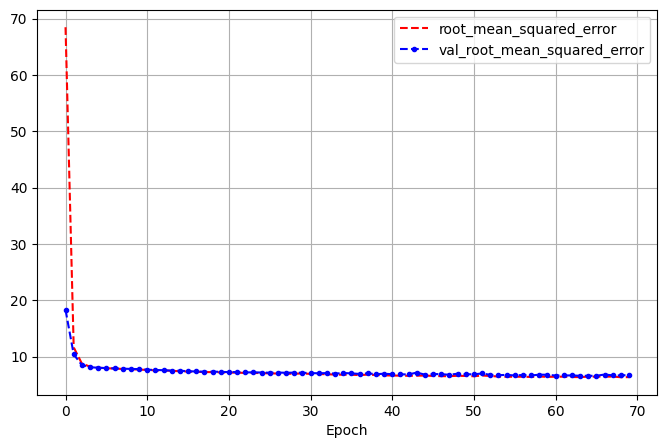

In [92]:
pd.DataFrame(history.history)[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "b--."])
plt.show()

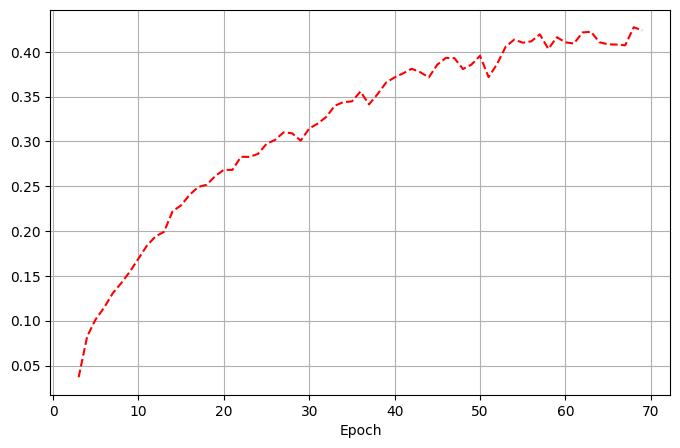

In [93]:
HIST = pd.DataFrame(history.history)
HIST2 = HIST[HIST["r2_score"] >= 0.01]
HIST2["r2_score"].plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "b--."])
plt.show()

In [94]:
team1list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team2list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

predict = {
    "Team1" : team1list,
    "Team2" : team2list
}
df_predict = pd.DataFrame(predict)
finalmerge = pd.merge(df_predict,team_df, left_on='Team1', right_on='Tm', how='left')
finalmerge = finalmerge.drop("Tm", axis='columns')
finalfinalmerge = pd.merge(finalmerge,team_df2, left_on='Team2', right_on='Tm', how='left')
finalpredict = finalfinalmerge.drop("Tm", axis='columns')
finalpredict = finalpredict.drop("Team1", axis='columns')
finalpredict = finalpredict.drop("Team2", axis='columns')
for x in finalpredict.columns:
    finalpredict[x] = finalpredict[x].astype(str).astype(float)
finalpredict["PPP"] = finalpredict["PF"]/finalpredict["Ply"]
finalpredict["PPPA"] = finalpredict["DPA"]/finalpredict["DPly"]
finalpredict["PPPD"] = finalpredict["PPP"] - finalpredict["PPPA"]
finalpredict["T2PPP"] = finalpredict["T2PF"]/finalpredict["T2Ply"]
finalpredict["T2PPPA"] = finalpredict["T2DPA"]/finalpredict["T2DPly"]
finalpredict["T2PPPD"] = finalpredict["T2PPP"] - finalpredict["T2PPPA"]
numgames = 17 #Num of games so far in season
finalpredict["YdsT1"] = (finalpredict["Y/P"] * finalpredict["Ply"]) / numgames
finalpredict["YdsT2T2"] = (finalpredict["T2Y/P"] * finalpredict["T2Ply"]) / numgames
column_to_move = finalpredict.pop('YdsT1')
finalpredict.insert(0, 'YdsT1', column_to_move) 
column_to_move = finalpredict.pop('YdsT2T2')
finalpredict.insert(1, 'YdsT2T2', column_to_move) 
firstg_pred = model.predict(finalpredict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [95]:
team2list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team1list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

predict = {
    "Team1" : team1list,
    "Team2" : team2list
}
df_predict = pd.DataFrame(predict)
finalmerge = pd.merge(df_predict,team_df, left_on='Team1', right_on='Tm', how='left')
finalmerge = finalmerge.drop("Tm", axis='columns')
finalfinalmerge = pd.merge(finalmerge,team_df2, left_on='Team2', right_on='Tm', how='left')
finalpredict = finalfinalmerge.drop("Tm", axis='columns')
finalpredict = finalpredict.drop("Team1", axis='columns')
finalpredict = finalpredict.drop("Team2", axis='columns')
for x in finalpredict.columns:
    finalpredict[x] = finalpredict[x].astype(str).astype(float)
finalpredict["PPP"] = finalpredict["PF"]/finalpredict["Ply"]
finalpredict["PPPA"] = finalpredict["DPA"]/finalpredict["DPly"]
finalpredict["PPPD"] = finalpredict["PPP"] - finalpredict["PPPA"]
finalpredict["T2PPP"] = finalpredict["T2PF"]/finalpredict["T2Ply"]
finalpredict["T2PPPA"] = finalpredict["T2DPA"]/finalpredict["T2DPly"]
finalpredict["T2PPPD"] = finalpredict["T2PPP"] - finalpredict["T2PPPA"]
numgames = 17 #Num of games so far in season
finalpredict["YdsT1"] = (finalpredict["Y/P"] * finalpredict["Ply"]) / numgames
finalpredict["YdsT2T2"] = (finalpredict["T2Y/P"] * finalpredict["T2Ply"]) / numgames
column_to_move = finalpredict.pop('YdsT1')
finalpredict.insert(0, 'YdsT1', column_to_move) 
column_to_move = finalpredict.pop('YdsT2T2')
finalpredict.insert(1, 'YdsT2T2', column_to_move) 
secondg_pred = model.predict(finalpredict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [96]:
finalpredictlist = []
for x in range(len(firstg_pred)):
    first = firstg_pred[x]
    second = secondg_pred[x]
    team1dif = (first[0] + second[1])/2
    team2dif = (first[1] + second[0])/2
    finalpredictlist.append([team1dif,team2dif])

In [97]:
team1list = ["Buffalo Bills", 'Las Vegas Raiders','Los Angeles Chargers','New Orleans Saints','Tampa Bay Buccaneers','Indianapolis Colts','Cleveland Browns','San Francisco 49ers','Seattle Seahawks','New York Jets'
               ,'New York Giants','Los Angeles Rams','Pittsburgh Steelers','Cincinnati Bengals','Chicago Bears','Atlanta Falcons']
team2list = ["Miami Dolphins",'Baltimore Ravens','Carolina Panthers','Dallas Cowboys','Detroit Lions','Green Bay Packers','Jacksonville Jaguars','Minnesota Vikings','New England Patriots','Tennessee Titans'
               ,'Washington Commanders','Arizona Cardinals','Denver Broncos','Kansas City Chiefs','Houston Texans','Philadelphia Eagles']

In [98]:
gamenum = 0
for x in finalpredictlist:
    print(f"Team1: {team1list[gamenum]} Team2: {team2list[gamenum]}")
    print(f"{x[0]} , {x[1]}")
    print(x[0] - x[1])
    print(x[0] + x[1])
    print("--------------------------")
    gamenum = gamenum + 1

Team1: Buffalo Bills Team2: Miami Dolphins
25.339374542236328 , 22.08987808227539
3.2494964599609375
47.42925262451172
--------------------------
Team1: Las Vegas Raiders Team2: Baltimore Ravens
21.86417007446289 , 28.88444709777832
-7.02027702331543
50.74861717224121
--------------------------
Team1: Los Angeles Chargers Team2: Carolina Panthers
24.06570053100586 , 19.74439811706543
4.32130241394043
43.81009864807129
--------------------------
Team1: New Orleans Saints Team2: Dallas Cowboys
22.598310470581055 , 21.39395523071289
1.204355239868164
43.992265701293945
--------------------------
Team1: Tampa Bay Buccaneers Team2: Detroit Lions
29.475072860717773 , 31.451751708984375
-1.9766788482666016
60.92682456970215
--------------------------
Team1: Indianapolis Colts Team2: Green Bay Packers
23.662803649902344 , 27.282562255859375
-3.6197586059570312
50.94536590576172
--------------------------
Team1: Cleveland Browns Team2: Jacksonville Jaguars
17.70832061767578 , 19.656558990478516

In [ ]:
gamenum = 0
for x in finalpredictlist:
    print(f"Team1: {team1list[gamenum]} Team2: {team2list[gamenum]}")
    print(x[0] - x[1])
    gamenum = gamenum + 1

Team1: Buffalo Bills Team2: Miami Dolphins
3.2494964599609375
Team1: Las Vegas Raiders Team2: Baltimore Ravens
-7.02027702331543
Team1: Los Angeles Chargers Team2: Carolina Panthers
4.32130241394043
Team1: New Orleans Saints Team2: Dallas Cowboys
1.204355239868164
Team1: Tampa Bay Buccaneers Team2: Detroit Lions
-1.9766788482666016
Team1: Indianapolis Colts Team2: Green Bay Packers
-3.6197586059570312
Team1: Cleveland Browns Team2: Jacksonville Jaguars
-1.9482383728027344
Team1: San Francisco 49ers Team2: Minnesota Vikings
-2.0558242797851562
Team1: Seattle Seahawks Team2: New England Patriots
3.3592796325683594
Team1: New York Jets Team2: Tennessee Titans
1.8113040924072266
Team1: New York Giants Team2: Washington Commanders
-5.9295654296875
Team1: Los Angeles Rams Team2: Arizona Cardinals
-1.2152633666992188
Team1: Pittsburgh Steelers Team2: Denver Broncos
-2.4671459197998047
Team1: Cincinnati Bengals Team2: Kansas City Chiefs
0.44538116455078125
Team1: Chicago Bears Team2: Houston T

In [100]:
gamenum = 0
for x in finalpredictlist:
    print(f"Team1: {team1list[gamenum]} Team2: {team2list[gamenum]}")
    print(x[0] + x[1])
    gamenum = gamenum + 1

Team1: Buffalo Bills Team2: Miami Dolphins
47.42925262451172
Team1: Las Vegas Raiders Team2: Baltimore Ravens
50.74861717224121
Team1: Los Angeles Chargers Team2: Carolina Panthers
43.81009864807129
Team1: New Orleans Saints Team2: Dallas Cowboys
43.992265701293945
Team1: Tampa Bay Buccaneers Team2: Detroit Lions
60.92682456970215
Team1: Indianapolis Colts Team2: Green Bay Packers
50.94536590576172
Team1: Cleveland Browns Team2: Jacksonville Jaguars
37.3648796081543
Team1: San Francisco 49ers Team2: Minnesota Vikings
51.90354537963867
Team1: Seattle Seahawks Team2: New England Patriots
40.481929779052734
Team1: New York Jets Team2: Tennessee Titans
42.60875129699707
Team1: New York Giants Team2: Washington Commanders
44.270301818847656
Team1: Los Angeles Rams Team2: Arizona Cardinals
48.1256103515625
Team1: Pittsburgh Steelers Team2: Denver Broncos
40.70254707336426
Team1: Cincinnati Bengals Team2: Kansas City Chiefs
46.82683563232422
Team1: Chicago Bears Team2: Houston Texans
37.09862